TC2029 Ciencia y Analitica de Datos
Dra. María de la Paz Rico Fernández 

Juan Pablo Bladinieres Martin del Campo A01793474
Gerardo Quiroga                         A00967999

In [1]:
!pip install qeds
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 179 kB 8.4 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=46970b64250e8ced884e86a8a31d6e55c88948a36e6aa0c69a21615911c9d072
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
Successfully built qeds
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 6.3 MB 39.0 MB/s 
     |████████████████████████████████| 16.7 MB 798 kB/s 


In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import qeds
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

qeds.themes.mpl_style();

In [3]:
#path1='./Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv'
#path2='./Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'
path1="https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo_38/main/Reto%201/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv"
df=pd.read_csv(path1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   float64
 12  DBO_mg/L                2581 non-null   object 
 13  CALIDAD_DBO             2581 non-null   object 
 14  DQO_mg/L                2581 non-null   

In [4]:
df.head(3)

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


In [5]:
# Separación de tipos de variables
binarias=['CUMPLE_CON_DBO','CUMPLE_CON_DQO','CUMPLE_CON_SST','CUMPLE_CON_CF','CUMPLE_CON_E_COLI','CUMPLE_CON_ENTEROC','CUMPLE_CON_OD','CUMPLE_CON_TOX']
categoricas=['TIPO','SUBTIPO','SEMAFORO','CONTAMINANTES','GRUPO']
calidades=['CALIDAD_DBO','CALIDAD_DQO','CALIDAD_SST','CALIDAD_COLI_FEC','CALIDAD_E_COLI','CALIDAD_ENTEROC','CALIDAD_OD_PORC','CALIDAD_OD_PORC_SUP','CALIDAD_OD_PORC_MED','CALIDAD_OD_PORC_FON','CALIDAD_TOX_V_15','CALIDAD_TOX_D_48','CALIDAD TOX_D_48_SUP','CALIDAD_TOX_D_48_FON','CALIDAD_TOX_FIS_SUP_15','CALIDAD_TOX_FIS_FON_15']
localizacion=['SITIO','ESTADO','MUNICIPIO','CUENCA','CUERPO DE AGUA','ORGANISMO_DE_CUENCA','LONGITUD','LATITUD']
numericas=['DBO_mg/L','DQO_mg/L','SST_mg/L','COLI_FEC_NMP_100mL','E_COLI_NMP_100mL','ENTEROC_NMP_100mL','OD_PORC','OD_PORC_SUP','OD_PORC_MED','OD_PORC_FON','TOX_V_15_UT','TOX_D_48_UT','TOX_D_48_SUP_UT','TOX_D_48_FON_UT','TOX_FIS_SUP_15_UT','TOX_FIS_FON_15_UT']
identificador=['CLAVE']
nonecesarios=['PERIODO']


Se determina que el periodo no es necesario dado que solo contiene un dato (del año pero no es diferente) nota: podría ser util en el caso de que se comparen periodos pero en esta base de datos no es necesario.

In [6]:
# Transformación de Binarias
test=df[binarias].copy()
test.replace({'ND':0,'NO':0,'SI':1}, inplace= True)
for i in test.columns:
    print(test.groupby(i).size())

CUMPLE_CON_DBO
0.0    1174
1.0    2319
dtype: int64
CUMPLE_CON_DQO
0.0    1843
1.0    1650
dtype: int64
CUMPLE_CON_SST
0.0     389
1.0    3104
dtype: int64
CUMPLE_CON_CF
0.0    2545
1.0     948
dtype: int64
CUMPLE_CON_E_COLI
0.0    2040
1.0    1453
dtype: int64
CUMPLE_CON_ENTEROC
0.0    2741
1.0     752
dtype: int64
CUMPLE_CON_OD
0.0     535
1.0    2958
dtype: int64
CUMPLE_CON_TOX
0.0      82
1.0    3411
dtype: int64


En esta transformación se determina que el ND y NO son igual que 0 por lo tanto se recomienda juntar estos dos resultados y al final se cambian a valores de 1 y 0 para mejorar la visibilidad.

In [7]:
test3=df[localizacion].copy()
test3.drop(['SITIO','ESTADO','MUNICIPIO','CUENCA','CUERPO DE AGUA','ORGANISMO_DE_CUENCA'],axis=1,inplace=True)
for i in test3.columns:
    print(test3.groupby(i).size())

LONGITUD
-117.12403    1
-117.10789    1
-117.10715    1
-117.09717    1
-117.08115    1
             ..
-86.75637     1
-86.75567     1
-86.74517     1
-86.73982     1
-86.73215     1
Length: 3486, dtype: int64
LATITUD
14.53491    1
14.54128    1
14.55447    1
14.61337    1
14.61567    2
           ..
32.66399    1
32.66450    1
32.66608    1
32.70583    1
32.70650    1
Length: 3485, dtype: int64


Se recomienda solo dejar las longitudes y latitudes para que sea más sencillo de graficar en un mapa.

In [8]:
# Categoricas
test2=df[categoricas].copy()

test2.drop(['TIPO','CONTAMINANTES'],axis=1,inplace=True)
test2['SUBTIPO'] = test2["SUBTIPO"].str.upper()
test2['SEMAFORO'].replace({'Amarillo':'y','Rojo':'r','Verde':'g'},inplace=True)

for i in test2.columns:
    print(test2.groupby(i).size())

SUBTIPO
ARROYO                           135
BAHIA                            217
CANAL                             65
CENOTE                             1
CIENEGA                            6
DESCARGA                          67
DESCARGA INDUSTRIAL                6
DESCARGA MUNICIPAL                 1
DREN                              36
EMBALSE ARTIFICIAL                 1
ESTERO                            80
ESTUARIO                          59
LAGO                             232
LAGUNA                           328
MANANTIAL                         10
MANGLAR                           13
MAR                                1
MARISMA                           12
OCEANO-MAR                       266
PRESA                            463
RIO                             1478
SISTEMA DE RIEGO DE LA PRESA       1
TRANSICION RIO-MAR                 1
dtype: int64
SEMAFORO
g    1267
r    1091
y    1135
dtype: int64
GRUPO
COSTERO     988
LENTICO     733
LOTICO     1772
dtype: int64


Se observan que las variables de Tipo y Groupo son parecidas, por simplicidad se elimina Tipo para tener grupo. Por otro lado en Contaminantes se determina por la calidad observada por lo tanto tampoco es necesaria por que es más importante separar y no juntar en una sola columna por otro lado nos queda la columna de Subtipo el cual tiene errores de escritura por lo que se recomienda convertir todos los datos a mayusculas para evitar estos errores.
Se puede transformar la variable semaforo para que más adelante lo utilicemos como colores en un grafico.

In [9]:
calidades1=['CALIDAD_DBO','CALIDAD_DQO','CALIDAD_SST','CALIDAD_COLI_FEC','CALIDAD_E_COLI','CALIDAD_ENTEROC','CALIDAD_OD_PORC','CALIDAD_OD_PORC_SUP','CALIDAD_OD_PORC_MED','CALIDAD_OD_PORC_FON']
calidades2=['CALIDAD_TOX_V_15','CALIDAD_TOX_D_48','CALIDAD TOX_D_48_SUP','CALIDAD_TOX_D_48_FON','CALIDAD_TOX_FIS_SUP_15','CALIDAD_TOX_FIS_FON_15']

test4=df[calidades].copy()
test4[calidades1] = test4[calidades1].replace({np.NAN:'Excelente'})
test4[calidades2] = test4[calidades2].replace({np.NAN:'No Toxico'})

for i in test4.columns:
    print(test4.groupby(i).size())


CALIDAD_DBO
Aceptable                   672
Buena calidad               317
Contaminada                 201
Excelente                  2890
Fuertemente contaminada      61
dtype: int64
CALIDAD_DQO
Aceptable                   635
Buena calidad               453
Contaminada                 790
Excelente                  2122
Fuertemente contaminada     141
dtype: int64
CALIDAD_SST
Aceptable                   314
Buena calidad              1010
Contaminada                 230
Excelente                  2432
Fuertemente contaminada     155
dtype: int64
CALIDAD_COLI_FEC
Aceptable                   456
Buena calidad                93
Contaminada                 743
Excelente                  1958
Fuertemente contaminada     891
dtype: int64
CALIDAD_E_COLI
Aceptable                    60
Buena calidad               423
Contaminada                  75
Excelente                  2529
Fuertemente contaminada    1054
dtype: int64
CALIDAD_ENTEROC
Buena calidad                43
Contaminada        

Aqui tenemos datos nulos en las calidades inspeccionando es que estos datos son demaciado pequeños para poder afirmar algo por esta razón se interpretan como no toxicos o exelente dependiendo de la métrica. Aunque en algun punto tenemos que determinar si queremos hacer el modelo con estas calcificaciones o lo obtenemos directo de las medidas.

In [10]:
test5=df[numericas].copy()
test5.replace({np.NAN:0}, inplace=True)
test5.replace({'<2':0,'<10':0,'<3':0,'<1':0}, inplace=True)
test5 = test5.astype("float")
test5.describe()

,DBO_mg/L,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL,ENTEROC_NMP_100mL,OD_PORC,OD_PORC_SUP,OD_PORC_MED,OD_PORC_FON,TOX_V_15_UT,TOX_D_48_UT,TOX_D_48_SUP_UT,TOX_D_48_FON_UT,TOX_FIS_SUP_15_UT,TOX_FIS_FON_15_UT
count,4141.000000,4141.000000,4141.000000,4.141000e+03,4.141000e+03,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.0,4141.000000,4141.0
mean,9.933834,38.747509,83.939839,5.966389e+04,4.946844e+04,236.897778,28.739918,31.812050,8.385607,15.191572,0.385248,0.048033,0.015851,0.0,0.014168,0.0
std,52.175019,122.697137,407.697458,9.240891e+05,8.309977e+05,2060.532745,39.224503,43.602828,24.776157,31.169654,4.294465,0.510884,0.405666,0.0,0.256172,0.0
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
50%,0.000000,0.000000,18.000000,2.100000e+02,1.100000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
75%,5.000000,35.750000,48.000000,4.600000e+03,1.100000e+03,0.000000,61.600000,70.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
max,1500.000000,2871.250000,9430.000000,2.419600e+07,2.419600e+07,24196.000000,226.100000,289.000000,133.000000,146.000000,156.250000,23.949000,21.320000,0.0,7.870000,0.0


Las variables númericas tienen dos problemas tienen nulos y tienen datos como <1 o <3 estos se deben de modificar para que sean 0.

In [11]:
# Transformación completa de los resultados del analisis
df=pd.read_csv(path1)

df.rename(mapper=df['CLAVE'],axis=0,inplace=True)

df["Coordinates"] = list(zip(df.LONGITUD, df.LATITUD))
df["Coordinates"] = df["Coordinates"].apply(Point)

df.drop(['CLAVE','TIPO','CONTAMINANTES','PERIODO','SITIO','ESTADO','MUNICIPIO','CUENCA','CUERPO DE AGUA','ORGANISMO_DE_CUENCA'],axis=1,inplace=True)

df['SUBTIPO']=df["SUBTIPO"].astype("string")
df['SEMAFORO']=df["SEMAFORO"].astype("string")
df['GRUPO']=df["GRUPO"].astype("string")
df['SUBTIPO']=df["SUBTIPO"].str.upper()
df['SEMAFORO']=df['SEMAFORO'].replace({'Amarillo':'y','Rojo':'r','Verde':'g'})

localizacion=['LATITUD','LONGITUD']
for i in localizacion:
    df[i]=df[i].astype("float")
    
numericas=['DBO_mg/L','DQO_mg/L','SST_mg/L','COLI_FEC_NMP_100mL','E_COLI_NMP_100mL','ENTEROC_NMP_100mL','OD_PORC','OD_PORC_SUP','OD_PORC_MED','OD_PORC_FON','TOX_V_15_UT','TOX_D_48_UT','TOX_D_48_SUP_UT','TOX_D_48_FON_UT','TOX_FIS_SUP_15_UT','TOX_FIS_FON_15_UT']
for i in numericas:
    df[i]=df[i].replace({np.NAN:0})
    df[i]=df[i].replace({'<2':0,'<10':0,'<3':0,'<1':0})
    df[i]=df[i].astype("float")

calidades1=['CALIDAD_DBO','CALIDAD_DQO','CALIDAD_SST','CALIDAD_COLI_FEC','CALIDAD_E_COLI','CALIDAD_ENTEROC','CALIDAD_OD_PORC','CALIDAD_OD_PORC_SUP','CALIDAD_OD_PORC_MED','CALIDAD_OD_PORC_FON']
for i in calidades1:
    df[i]=df[i].replace({np.NAN:'Sin Medida'})
    df[i]=df[i].astype("string")

calidades2=['CALIDAD_TOX_V_15','CALIDAD_TOX_D_48','CALIDAD TOX_D_48_SUP','CALIDAD_TOX_D_48_FON','CALIDAD_TOX_FIS_SUP_15','CALIDAD_TOX_FIS_FON_15']
for i in calidades2:
    df[i]=df[i].replace({np.NAN:'Sin Medida'})
    df[i]=df[i].astype("string")

binarias=['CUMPLE_CON_DBO','CUMPLE_CON_DQO','CUMPLE_CON_SST','CUMPLE_CON_CF','CUMPLE_CON_E_COLI','CUMPLE_CON_ENTEROC','CUMPLE_CON_OD','CUMPLE_CON_TOX']
for i in binarias:
    df[i]=df[i].replace({'ND':0,'NO':0,'SI':1})
    df[i]=df[i].astype("float")


df.describe(include='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4141 entries, DLAGU8 to nan
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SUBTIPO                 3479 non-null   string 
 1   LONGITUD                3493 non-null   float64
 2   LATITUD                 3493 non-null   float64
 3   DBO_mg/L                4141 non-null   float64
 4   CALIDAD_DBO             4141 non-null   string 
 5   DQO_mg/L                4141 non-null   float64
 6   CALIDAD_DQO             4141 non-null   string 
 7   SST_mg/L                4141 non-null   float64
 8   CALIDAD_SST             4141 non-null   string 
 9   COLI_FEC_NMP_100mL      4141 non-null   float64
 10  CALIDAD_COLI_FEC        4141 non-null   string 
 11  E_COLI_NMP_100mL        4141 non-null   float64
 12  CALIDAD_E_COLI          4141 non-null   string 
 13  ENTEROC_NMP_100mL       4141 non-null   float64
 14  CALIDAD_ENTEROC         4141 non-null   s

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [31]:
df.describe()

,LONGITUD,LATITUD,DBO_mg/L,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL,ENTEROC_NMP_100mL,OD_PORC,OD_PORC_SUP,...,TOX_FIS_SUP_15_UT,TOX_FIS_FON_15_UT,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX
count,3493.000000,3493.000000,4141.000000,4141.000000,4141.000000,4.141000e+03,4.141000e+03,4141.000000,4141.000000,4141.000000,...,4141.000000,4141.0,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000
mean,-100.359969,21.046992,9.933834,38.747509,83.939839,5.966389e+04,4.946844e+04,236.897778,28.739918,31.812050,...,0.014168,0.0,0.663899,0.472373,0.888634,0.271400,0.415975,0.215288,0.846837,0.976524
std,6.122773,3.893696,52.175019,122.697137,407.697458,9.240891e+05,8.309977e+05,2060.532745,39.224503,43.602828,...,0.256172,0.0,0.472441,0.499308,0.314629,0.444746,0.492960,0.411081,0.360197,0.151430
min,-117.124030,14.534910,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-103.882310,18.396070,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,-99.795530,20.148980,0.000000,0.000000,18.000000,2.100000e+02,1.100000e+01,0.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,-96.860230,22.828930,5.000000,35.750000,48.000000,4.600000e+03,1.100000e+03,0.000000,61.600000,70.600000,...,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,-86.732150,32.706500,1500.000000,2871.250000,9430.000000,2.419600e+07,2.419600e+07,24196.000000,226.100000,289.000000,...,7.870000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
df.corr()

,LONGITUD,LATITUD,DBO_mg/L,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL,ENTEROC_NMP_100mL,OD_PORC,OD_PORC_SUP,...,TOX_FIS_SUP_15_UT,TOX_FIS_FON_15_UT,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX
LONGITUD,1.000000,-0.713966,-0.004845,-0.013134,0.000766,-0.017869,-0.015878,-0.014317,-0.022233,-0.081512,...,0.019955,NaN,0.007980,0.010767,0.042338,0.021044,-0.044727,0.008823,0.058917,-0.040056
LATITUD,-0.713966,1.000000,-0.020814,-0.024695,-0.047574,0.004967,0.004417,-0.047095,0.067502,0.094280,...,-0.014043,NaN,-0.007730,0.026398,0.081863,0.016972,0.119817,0.050403,-0.017023,0.048305
DBO_mg/L,-0.004845,-0.020814,1.000000,0.883136,0.078177,0.613631,0.588488,-0.021895,-0.047619,-0.097627,...,0.012397,NaN,-0.179309,-0.156833,-0.194936,-0.051679,-0.087758,-0.108963,-0.302725,-0.449723
DQO_mg/L,-0.013134,-0.024695,0.883136,1.000000,0.141835,0.572932,0.581151,-0.036316,-0.022492,-0.103008,...,0.039049,NaN,-0.121527,-0.219944,-0.255178,-0.006053,-0.049777,-0.181813,-0.336624,-0.436516
SST_mg/L,0.000766,-0.047574,0.078177,0.141835,1.000000,0.038488,0.036999,-0.011137,0.138408,-0.093747,...,-0.000675,NaN,0.044036,-0.071791,-0.448025,-0.088172,-0.060550,-0.084020,0.012548,-0.033206
COLI_FEC_NMP_100mL,-0.017869,0.004967,0.613631,0.572932,0.038488,1.000000,0.932232,-0.007425,-0.028653,-0.045480,...,-0.003491,NaN,-0.075893,-0.058833,-0.127415,-0.042765,-0.056647,-0.036841,-0.138957,-0.209186
E_COLI_NMP_100mL,-0.015878,0.004417,0.588488,0.581151,0.036999,0.932232,1.000000,-0.006846,-0.028979,-0.043098,...,-0.003241,NaN,-0.073780,-0.056487,-0.114791,-0.039502,-0.054604,-0.033965,-0.133849,-0.226194
ENTEROC_NMP_100mL,-0.014317,-0.047095,-0.021895,-0.036316,-0.011137,-0.007425,-0.006846,1.000000,-0.084259,0.104014,...,-0.002705,NaN,-0.176172,-0.118604,0.003343,-0.076503,-0.105788,-0.061518,0.025662,0.019427
OD_PORC,-0.022233,0.067502,-0.047619,-0.022492,0.138408,-0.028653,-0.028979,-0.084259,1.000000,-0.534700,...,-0.040533,NaN,0.504051,0.448657,-0.188023,-0.050979,0.124034,-0.440428,0.194103,0.074834
OD_PORC_SUP,-0.081512,0.094280,-0.097627,-0.103008,-0.093747,-0.045480,-0.043098,0.104014,-0.534700,1.000000,...,0.060292,NaN,-0.368370,-0.262887,0.231953,0.132686,0.038929,0.469759,0.076157,0.107909


In [35]:
dfcorr = df

In [38]:
dfcorr.drop('TOX_D_48_FON_UT',axis=1, inplace=True)

In [40]:

dfcorr.drop('TOX_FIS_FON_15_UT',axis=1, inplace=True)

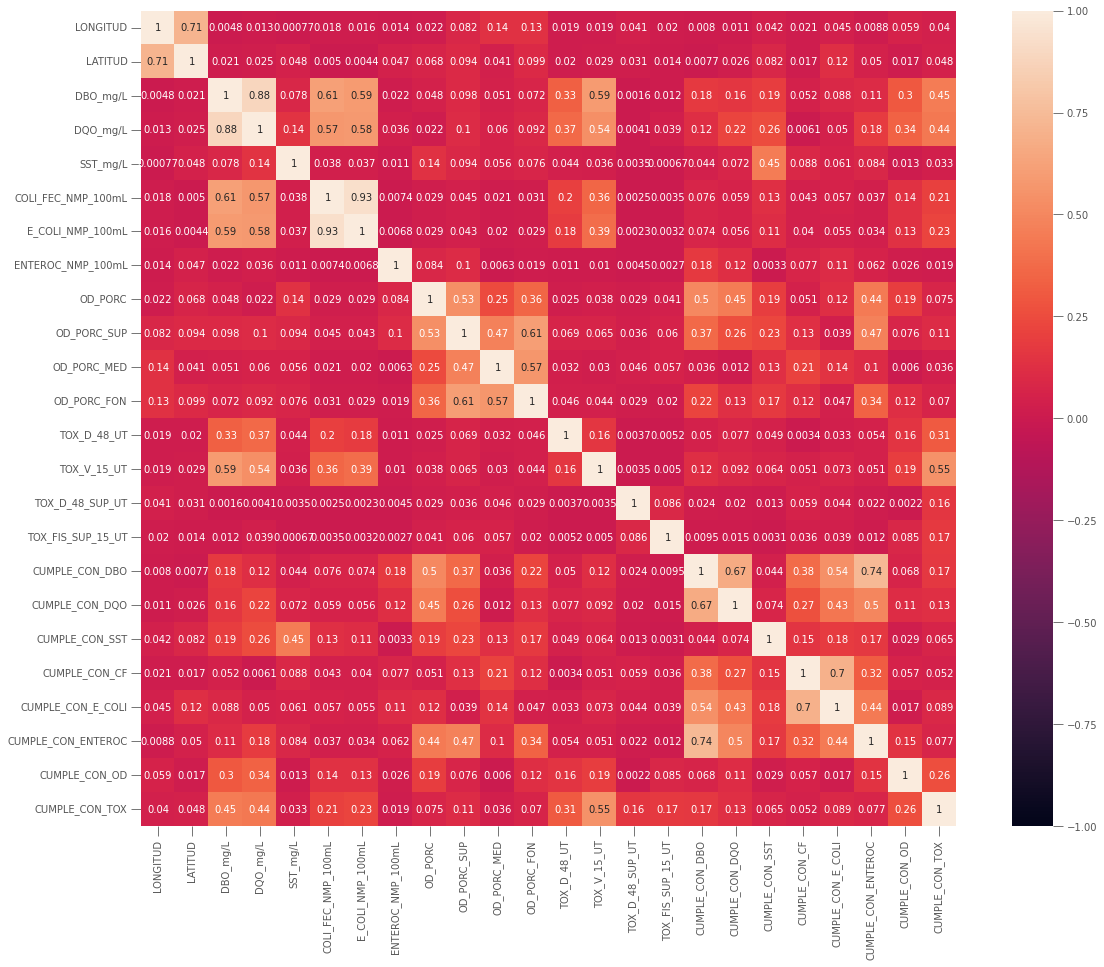

In [41]:
correlacion = dfcorr.corr().abs() 

f, ax = plt.subplots(figsize = (20,15)) 

sb.heatmap(correlacion, vmax = 1, vmin = -1, square = True, annot = True)

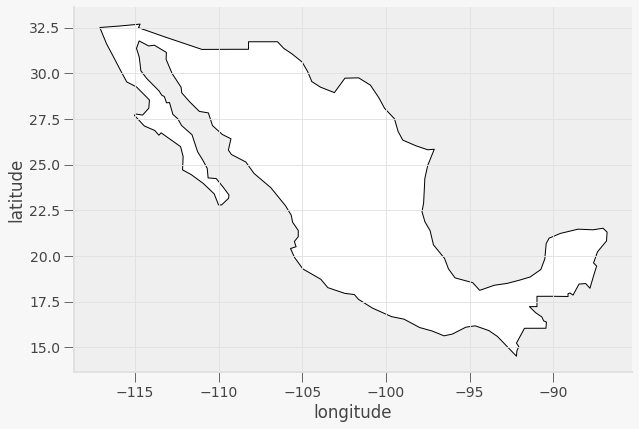

In [12]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


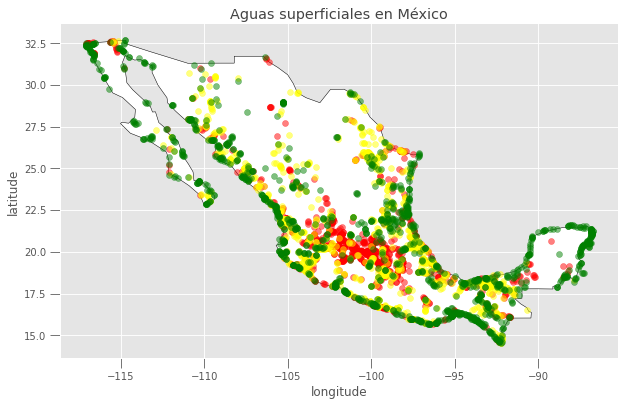

In [13]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

Xr= df.loc[df['SEMAFORO'] == 'r']
Xy= df.loc[df['SEMAFORO'] == 'y']
Xg= df.loc[df['SEMAFORO'] == 'g']
gdfr = gpd.GeoDataFrame(Xr, geometry="Coordinates") 
gdfy = gpd.GeoDataFrame(Xy, geometry="Coordinates") 
gdfg = gpd.GeoDataFrame(Xg, geometry="Coordinates") 
gdfr.plot(ax=gax, color='red', alpha = 0.5)
gdfy.plot(ax=gax, color='yellow', alpha = 0.5)
gdfg.plot(ax=gax, color='green', alpha = 0.5)


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Aguas superficiales en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


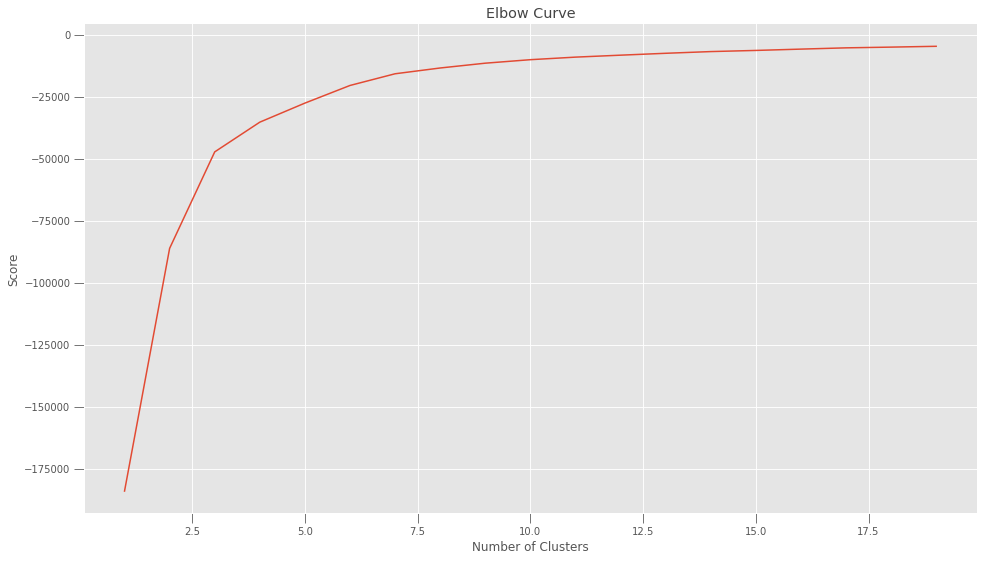

In [14]:
latlong=df[localizacion]
latlong.dropna(inplace=True)
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(latlong).score(latlong) for i in range(len(kmeans))]
score

plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [15]:
kmeans = KMeans(n_clusters=5).fit(latlong)
centroids = kmeans.cluster_centers_
print(centroids)

[[  18.85332077  -98.91973261]
 [  21.55627989 -104.46702415]
 [  17.84328155  -91.98520227]
 [  28.54178895 -111.62753504]
 [  24.42164182  -99.21862229]]


In [16]:
df2=pd.DataFrame(centroids)
df2.columns=['latitude','longitude']
df2["Coordinates"] = list(zip(df2.longitude, df2.latitude))
df2["Coordinates"] = df2["Coordinates"].apply(Point)
df2.head()

,latitude,longitude,Coordinates
0,18.853321,-98.919733,POINT (-98.91973261047463 18.85332076923077)
1,21.556280,-104.467024,POINT (-104.46702415286624 21.556279885350317)
2,17.843282,-91.985202,POINT (-91.98520227340268 17.843281545319467)
3,28.541789,-111.627535,POINT (-111.62753503649634 28.54178895377129)
4,24.421642,-99.218622,POINT (-99.21862228855721 24.421641815920395)


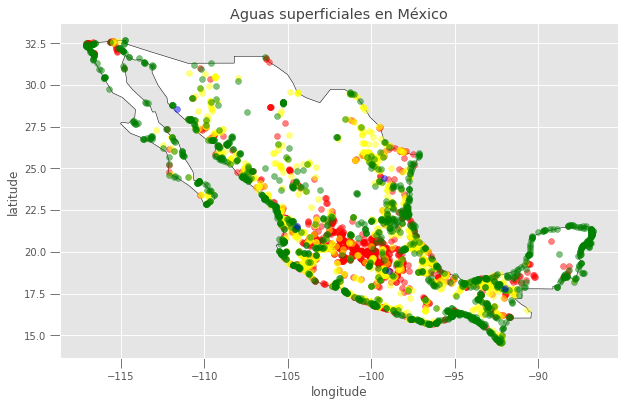

In [17]:
gdf2 = gpd.GeoDataFrame(df2, geometry="Coordinates")
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gdfr.plot(ax=gax, color='red', alpha = 0.5)
gdfy.plot(ax=gax, color='yellow', alpha = 0.5)
gdfg.plot(ax=gax, color='green', alpha = 0.5)
gdf2.plot(ax=gax, color='blue', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Aguas superficiales en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [18]:
#Initialize the class object
kmeans = KMeans(n_clusters= 5)
cldf=df[localizacion].dropna()
 
#predict the labels of clusters.
label = kmeans.fit_predict(cldf)
label.astype(int)
cldf['label']=label

In [19]:
cls_vals0 = cldf[label == 0]
cls_vals0.columns=['latitude','longitude','cluster']
cls_vals0["Coordinates"] = list(zip(cls_vals0.longitude, cls_vals0.latitude))
cls_vals0["Coordinates"] = cls_vals0["Coordinates"].apply(Point)

cls_vals1 = cldf[label == 1]
cls_vals1.columns=['latitude','longitude','cluster']
cls_vals1["Coordinates"] = list(zip(cls_vals1.longitude, cls_vals1.latitude))
cls_vals1["Coordinates"] = cls_vals1["Coordinates"].apply(Point)

cls_vals2 = cldf[label == 2]
cls_vals2.columns=['latitude','longitude','cluster']
cls_vals2["Coordinates"] = list(zip(cls_vals2.longitude, cls_vals2.latitude))
cls_vals2["Coordinates"] = cls_vals2["Coordinates"].apply(Point)

cls_vals3 = cldf[label == 3]
cls_vals3.columns=['latitude','longitude','cluster']
cls_vals3["Coordinates"] = list(zip(cls_vals3.longitude, cls_vals3.latitude))
cls_vals3["Coordinates"] = cls_vals3["Coordinates"].apply(Point)

cls_vals4 = cldf[label == 4]
cls_vals4.columns=['latitude','longitude','cluster']
cls_vals4["Coordinates"] = list(zip(cls_vals4.longitude, cls_vals4.latitude))
cls_vals4["Coordinates"] = cls_vals4["Coordinates"].apply(Point)
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

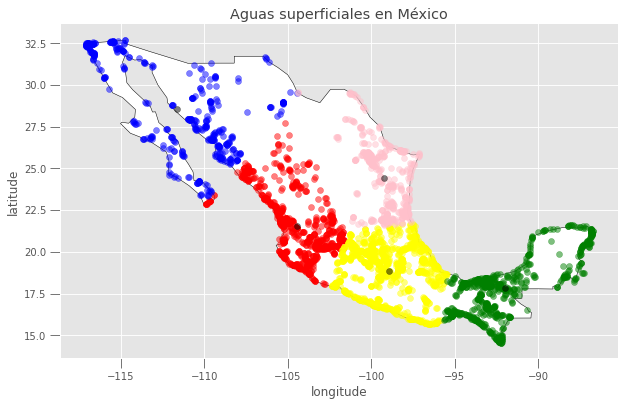

In [20]:
# Cluster 

gdf2 = gpd.GeoDataFrame(df2, geometry="Coordinates")

gdfcl0 = gpd.GeoDataFrame(cls_vals0, geometry="Coordinates")
gdfcl1 = gpd.GeoDataFrame(cls_vals1, geometry="Coordinates")
gdfcl2 = gpd.GeoDataFrame(cls_vals2, geometry="Coordinates")
gdfcl3 = gpd.GeoDataFrame(cls_vals3, geometry="Coordinates")
gdfcl4 = gpd.GeoDataFrame(cls_vals4, geometry="Coordinates")

fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gdfcl0.plot(ax=gax, color='red', alpha = 0.5)
gdfcl1.plot(ax=gax, color='yellow', alpha = 0.5)
gdfcl2.plot(ax=gax, color='green', alpha = 0.5)
gdfcl3.plot(ax=gax, color='blue', alpha = 0.5)
gdfcl4.plot(ax=gax, color='pink', alpha = 0.5)
gdf2.plot(ax=gax, color='black', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Aguas superficiales en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


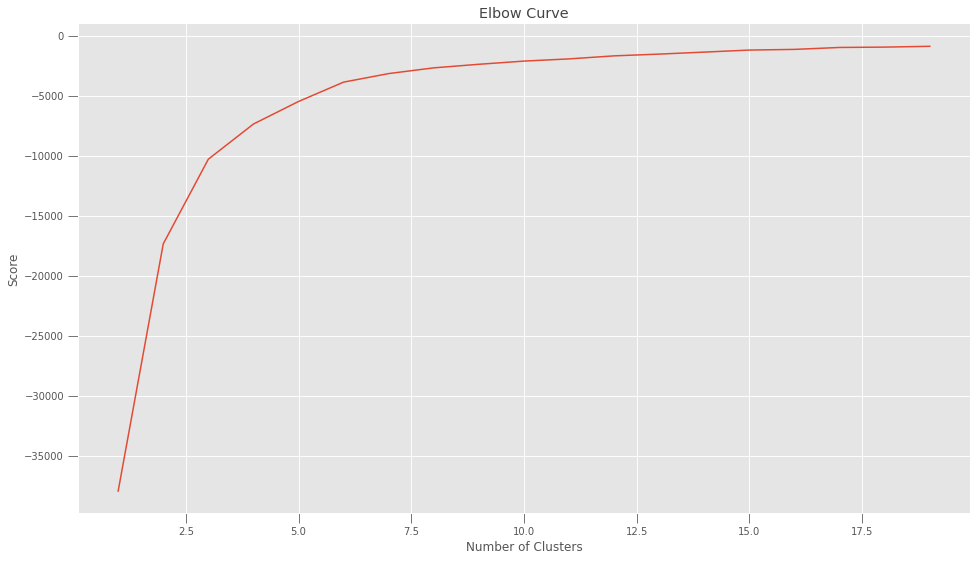

In [21]:
# Red Light KMEANS
latlong2=Xr[localizacion]
latlong2.dropna(inplace=True)
kmeans2 = [KMeans(n_clusters=i) for i in Nc]
score2 = [kmeans2[i].fit(latlong2).score(latlong2) for i in range(len(kmeans2))]

plt.plot(Nc,score2)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

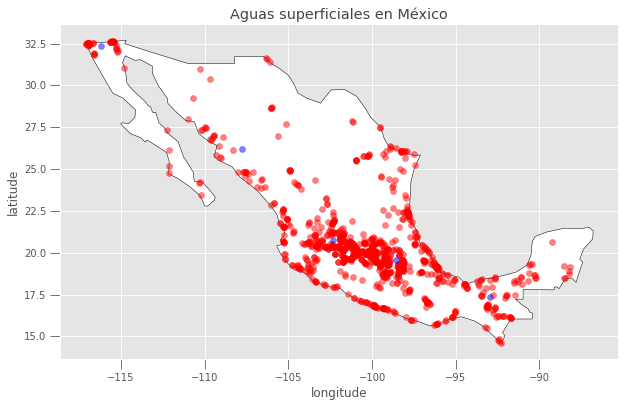

In [22]:
# RED Trafic Light PLOT
kmeans2 = KMeans(n_clusters=5).fit(latlong2)
centroids2 = kmeans2.cluster_centers_

df3=pd.DataFrame(centroids2)
df3.columns=['latitude','longitude']
df3["Coordinates"] = list(zip(df3.longitude, df3.latitude))
df3["Coordinates"] = df3["Coordinates"].apply(Point)
gdf3 = gpd.GeoDataFrame(df3, geometry="Coordinates")
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gdfr.plot(ax=gax, color='red', alpha = 0.5)
gdf3.plot(ax=gax, color='blue', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Aguas superficiales en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


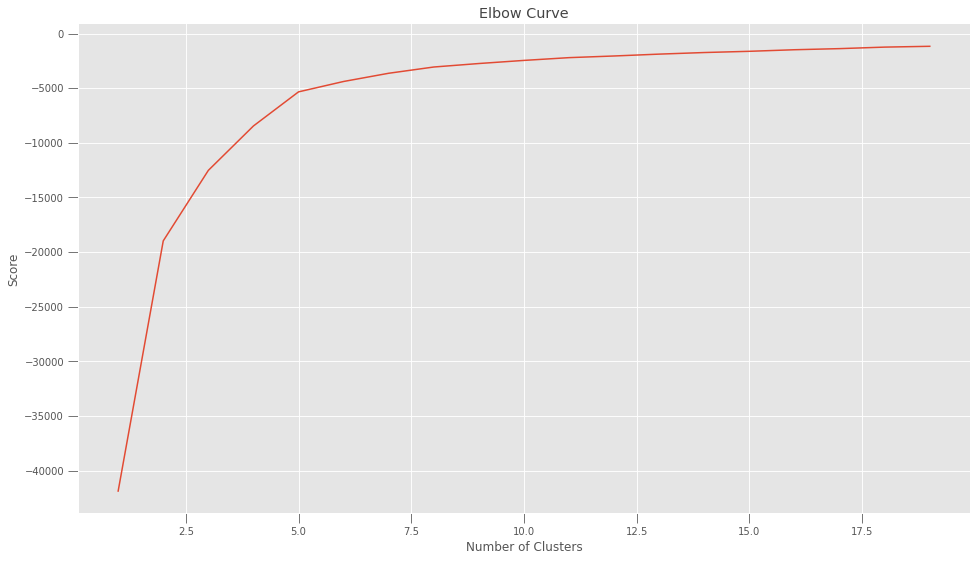

In [23]:
# yellow Light KMEANS
latlong3=Xy[localizacion]
latlong3.dropna(inplace=True)
kmeans3 = [KMeans(n_clusters=i) for i in Nc]
score3 = [kmeans3[i].fit(latlong3).score(latlong3) for i in range(len(kmeans3))]

plt.plot(Nc,score3)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

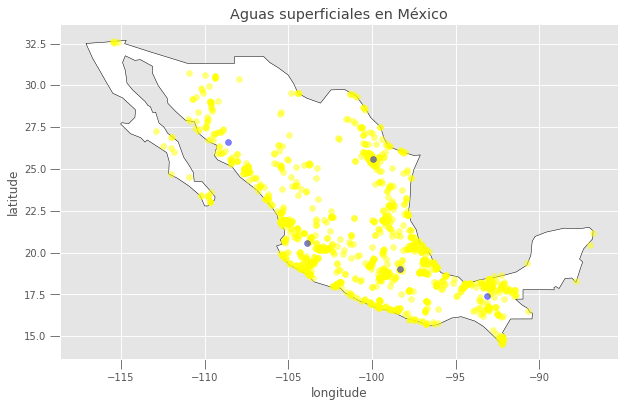

In [24]:
# Yellow Trafic Light PLOT
kmeans3 = KMeans(n_clusters=5).fit(latlong3)
centroids3 = kmeans3.cluster_centers_

df4=pd.DataFrame(centroids3)
df4.columns=['latitude','longitude']
df4["Coordinates"] = list(zip(df4.longitude, df4.latitude))
df4["Coordinates"] = df4["Coordinates"].apply(Point)
gdf4 = gpd.GeoDataFrame(df4, geometry="Coordinates")
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gdfy.plot(ax=gax, color='yellow', alpha = 0.5)
gdf4.plot(ax=gax, color='blue', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Aguas superficiales en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


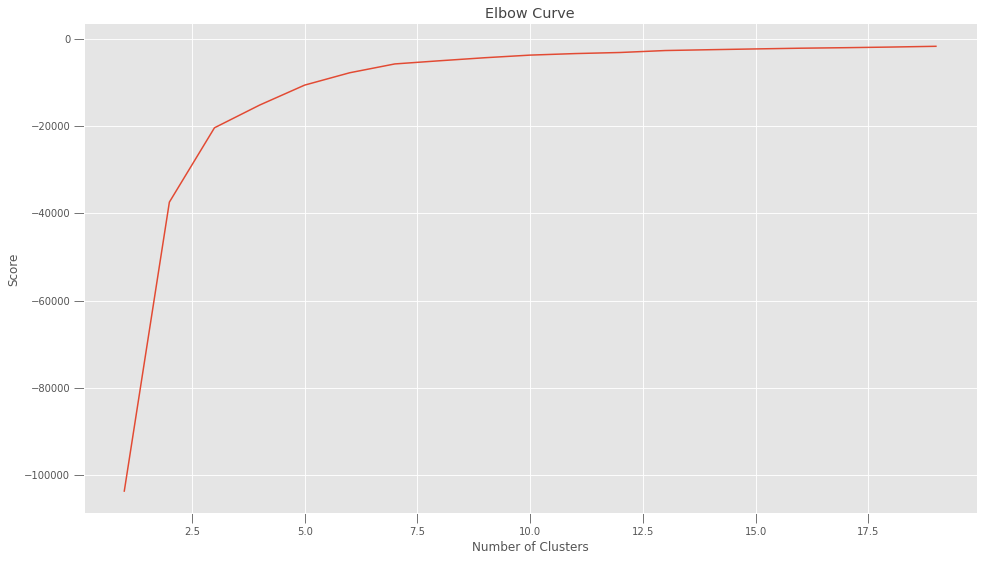

In [25]:
# Green Light KMEANS
latlong4=Xg[localizacion]
latlong4.dropna(inplace=True)
kmeans4 = [KMeans(n_clusters=i) for i in Nc]
score4 = [kmeans4[i].fit(latlong4).score(latlong4) for i in range(len(kmeans4))]

plt.plot(Nc,score4)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

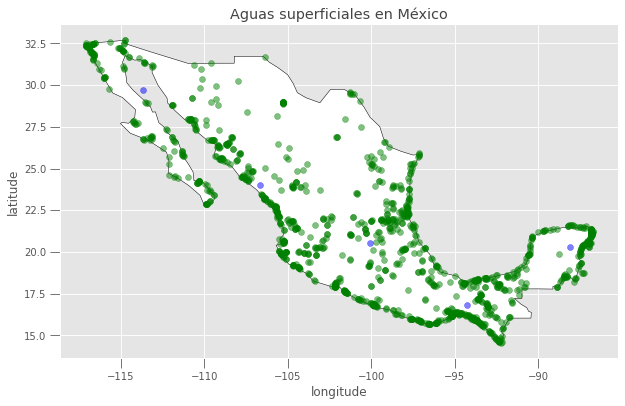

In [26]:
# Green Trafic Light PLOT
kmeans4 = KMeans(n_clusters=5).fit(latlong4)
centroids4 = kmeans4.cluster_centers_

df5=pd.DataFrame(centroids4)
df5.columns=['latitude','longitude']
df5["Coordinates"] = list(zip(df5.longitude, df5.latitude))
df5["Coordinates"] = df5["Coordinates"].apply(Point)
gdf5 = gpd.GeoDataFrame(df5, geometry="Coordinates")
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gdfg.plot(ax=gax, color='green', alpha = 0.5)
gdf5.plot(ax=gax, color='blue', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Aguas superficiales en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()
